<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Metric-based models</center></h2>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Curse of dimentionality

## Euclidean distance case

* For each dimensionality $d \in [1, 200]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.random.uniform`.


* Write the function that calculates Euclidean distances from the given point $x$ to its nearest and farthest
neighbors in the dataset (minimum and maximum distances).
    * HINT: `scipy.spatial.distance.cdist`, `np.max`, `np.min`


* Plot average minimum and maximum distances for varying $d$ (here you should calculate average values on dataset). Also plot their ratio — average maximum divided by average minimum. Does curse of dimentionality takes place here?

In [2]:
d = 2
X = np.random.uniform(low=-1, high=1, size=(100, d))


In [3]:
X.shape

(100, 2)

In [4]:
X[:10]

array([[-0.75568448, -0.26245873],
       [ 0.78464841, -0.94451518],
       [ 0.39474482, -0.57749316],
       [ 0.76636476,  0.49890461],
       [ 0.49637309, -0.77464808],
       [-0.40636326, -0.70147811],
       [-0.97197433,  0.08377294],
       [ 0.89598653,  0.22924135],
       [ 0.10838089, -0.64799228],
       [ 0.3021843 ,  0.62754235]])

In [5]:
from scipy.spatial.distance import cdist

In [6]:
D = cdist(X, X, )

In [7]:
D.shape

(100, 100)

In [8]:
np.max(D, axis=1)

array([1.91743808, 2.42607477, 1.90085066, 2.20475978, 2.12127697,
       2.00904933, 2.04392762, 2.14932401, 1.82019334, 1.97374887,
       1.89159962, 1.59798876, 2.05780527, 2.32707196, 1.87487139,
       2.22735975, 2.4376053 , 2.36307762, 1.64773358, 2.04298512,
       2.13215313, 1.98825587, 2.29423245, 2.00609905, 1.69853585,
       1.98965253, 1.58777277, 2.24929118, 1.86276774, 1.72903213,
       1.75817362, 1.41818608, 1.56809132, 1.87058187, 1.605877  ,
       1.43541341, 1.95557727, 2.16654833, 2.42607477, 1.80512974,
       2.1306359 , 1.86308804, 2.41812057, 2.14744124, 2.08519719,
       2.08627282, 2.32315696, 2.06690873, 2.36567328, 1.78079801,
       2.0195624 , 1.7146329 , 2.28630357, 1.65419019, 1.4736602 ,
       1.89130238, 1.99530772, 2.23184153, 1.96067051, 2.13868192,
       2.10125905, 2.01387513, 1.76790239, 1.4968702 , 2.1753891 ,
       1.45634227, 1.92234342, 1.97587383, 2.2454181 , 1.43731073,
       2.15537488, 1.45825774, 1.8595659 , 1.51256715, 1.86199

In [9]:
np.min(D, axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
min_avg = []
max_avg = []

for d in range(1, 201):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='euclidean')
    D[np.diag_indices(100)] = np.nan
    
    min_avg.append(np.nanmin(D, axis=1).mean())
    max_avg.append(np.nanmax(D, axis=1).mean())

In [11]:
len(min_avg)

200

In [12]:
min_avg = np.array(min_avg)
max_avg = np.array(max_avg)

In [13]:
ratio = max_avg/min_avg

In [14]:
ratio.shape

(200,)

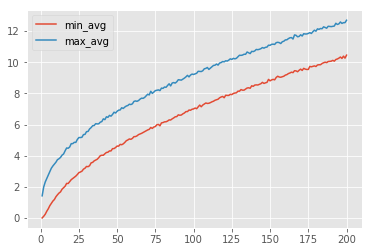

In [15]:
d = range(1,201)
plt.plot(d, min_avg, label='min_avg')
plt.plot(d, max_avg, label='max_avg')
plt.legend()

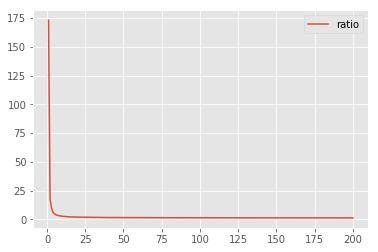

In [16]:
plt.plot(d, ratio, label='ratio')
plt.legend()

## Cosine distance case

* For each dimensionality $d \in [1, 10, 100, ..., 10000]$ generate a dataset of $100$ random points from uniform distribution
on $[−1, 1]^d$
    * HINT: `np.logspace`.


* Write the function that calculates angles between all points in dataset.
    * HINT: `np.degrees`, `np.arccos`


* Plot a histogram of computed angles for each $d$. Does curse of dimentionality takes place here?

In [17]:
D

array([[        nan, 12.18699104, 11.06342196, ..., 10.97312924,
        11.85928162, 11.32236062],
       [12.18699104,         nan, 11.98445645, ..., 10.98545899,
        11.83381646, 12.2357404 ],
       [11.06342196, 11.98445645,         nan, ..., 11.21293728,
        11.22766126, 11.83267643],
       ...,
       [10.97312924, 10.98545899, 11.21293728, ...,         nan,
        11.24072771, 11.22914315],
       [11.85928162, 11.83381646, 11.22766126, ..., 11.24072771,
                nan, 11.45288985],
       [11.32236062, 12.2357404 , 11.83267643, ..., 11.22914315,
        11.45288985,         nan]])

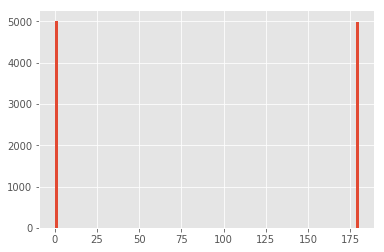

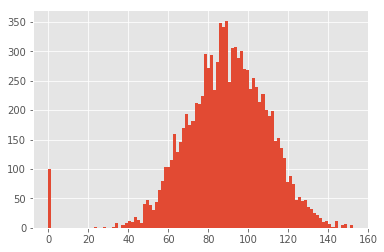

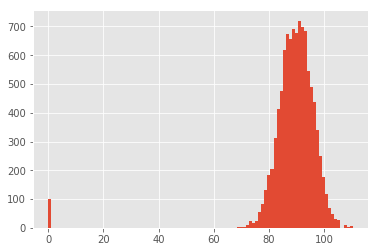

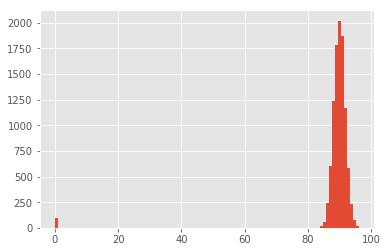

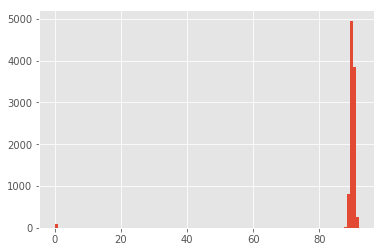

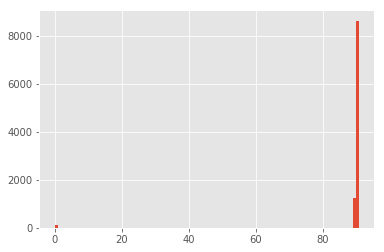

In [18]:
for d in np.logspace(0, 5, num=6, base=10, dtype=int):
    X = np.random.uniform(-1, 1, (100, d))
    
    D = cdist(X, X, metric='cosine')
#     D[np.diag_indices(100)] = np.nan
    D = -(D-1)
    angle_avg = (np.degrees(np.arccos(D))).flatten()

    plt.figure()
    plt.hist(angle_avg[~np.isnan(angle_avg)], bins=100)

# House prices in California

We are going to use build-in sklearn dataset

In [19]:
from sklearn.datasets import fetch_california_housing

In [20]:
data = fetch_california_housing()

X = data.data
y = data.target

In [21]:
print(data.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




* Plot lat and lon coordinates of each household and colorize it with respect to value of target feature
    * HINT: `plt.scatter()`

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <a list of 10 Patch objects>)

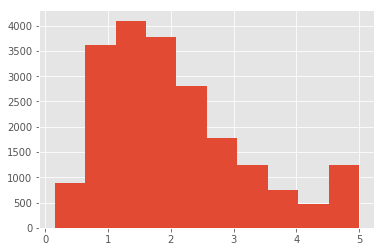

In [22]:
plt.hist(y)

In [23]:
X = X[:, -2:]

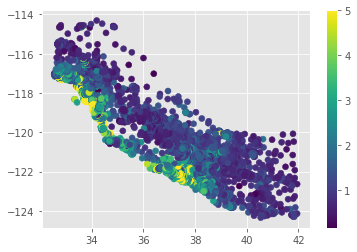

In [24]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

* Consider only geo-coordinates of houses in design matrix and convert them to radians
    * HINT: `np.radians`
* Split dataset to train and validation set on proportion 80/20
    * HINT: `sklearn.model_selection.train_test_split()` and don't forget to set `random_state`

In [25]:
X = np.radians(X)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=123)

In [28]:
X_train.shape

(16512, 2)

In [29]:
X_valid.shape

(4128, 2)

* Consider k-NN classifier with `haversine` distance metric
    * HINT: sklearn.metrics
* For k in 1..15 plot mean squared error at train and validation set
    * noticed any methodological failures?
    * whick $k$ would you pick?

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor(n_neighbors=2, metric='haversine', 
                           algorithm='ball_tree')

In [32]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='haversine',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [33]:
y_hat = knn.predict(X_train)

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_train, y_hat)

0.21116684714147288

In [86]:
scores_valid = []
scores_train = []

for k in range(1, 16):
#     knn = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree',
#                               metric='haversine')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
#     scores_train.append(mean_absolute_error(y_train, y_hat_train))
#     scores_valid.append(mean_absolute_error(y_valid, y_hat_valid))
    scores_train.append(recall_score(y_train, y_hat_train))
    scores_valid.append(recall_score(y_valid, y_hat_valid))
#     print y_train, y_hat_train

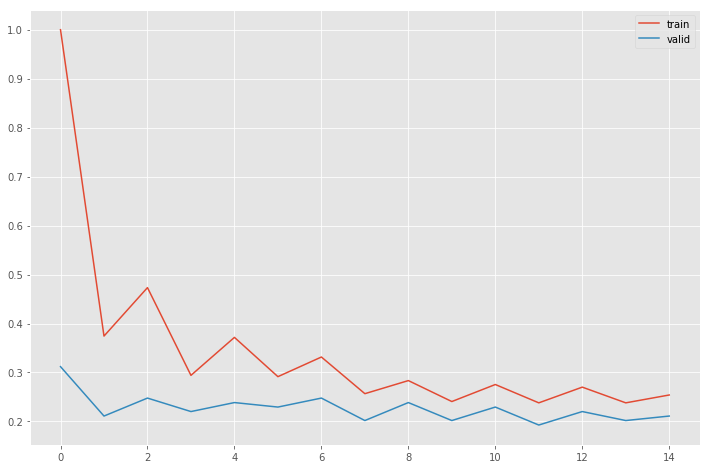

In [88]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()

In [90]:
scores_valid = []
scores_train = []

for k in range(1, 16):
#     knn = KNeighborsRegressor(n_neighbors=k, algorithm='ball_tree',
#                               metric='haversine')
    knn = Pipeline([
            ('scale', StandardScaler()),
            ('clf',  KNeighborsClassifier(n_neighbors=k)),
    ])
    knn.fit(X_train, y_train)
    
    y_hat_train = knn.predict(X_train)
    y_hat_valid = knn.predict(X_valid)
    
#     scores_train.append(mean_absolute_error(y_train, y_hat_train))
#     scores_valid.append(mean_absolute_error(y_valid, y_hat_valid))
    scores_train.append(recall_score(y_train, y_hat_train))
    scores_valid.append(recall_score(y_valid, y_hat_valid))
#     print y_train, y_hat_train

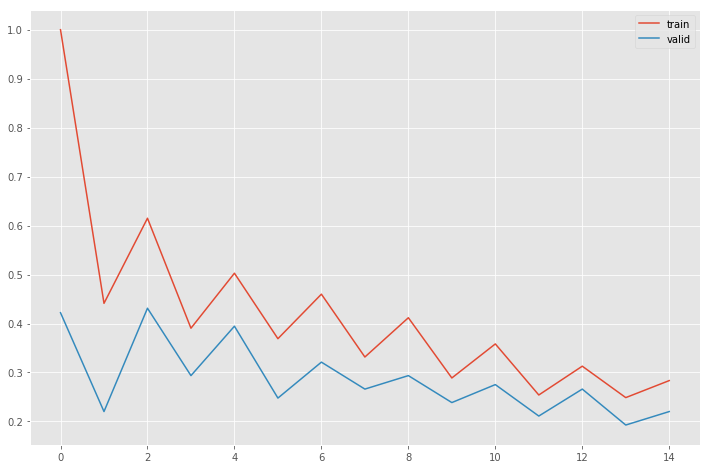

In [91]:
plt.plot(scores_train, label='train')
plt.plot(scores_valid, label='valid')
plt.legend()

* Pick your model and colorize the whole lat-lon grid with its predictions
    * HINT: `np.meshgrid()`, `plt.contourf()`

# Churn prediction

* Load churn dataset from the csv file with pandas
* Describe type of each feature
* Describe scale of each feature

In [43]:
df = pd.read_csv('./churn.csv')
df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [45]:
df['State'].nunique()

51

In [79]:
def preprocess_data(df_in):
    del_cols = ['State', 'Area Code', 'Phone']
    df_in = df_in.drop(del_cols, axis=1)
    
    df_in.loc[:, ['Int\'l Plan', 'VMail Plan']] = df_in.loc[:, ['Int\'l Plan', 'VMail Plan']]\
                                                       .replace({'no':0, 'yes':1})
    df_in.loc[:, 'Churn?'] = df_in.loc[:, ['Churn?']]\
                                  .replace({'False.':0, 'True.':1})
    
    return df_in

In [80]:
df_preproc = df.pipe(preprocess_data)
df_preproc.head().T

,0,1,2,3,4
Account Length,128.00,107.00,137.00,84.00,75.00
Int'l Plan,0.00,0.00,0.00,1.00,1.00
VMail Plan,1.00,1.00,0.00,0.00,0.00
VMail Message,25.00,26.00,0.00,0.00,0.00
Day Mins,265.10,161.60,243.40,299.40,166.70
Day Calls,110.00,123.00,114.00,71.00,113.00
Day Charge,45.07,27.47,41.38,50.90,28.34
Eve Mins,197.40,195.50,121.20,61.90,148.30
Eve Calls,99.00,103.00,110.00,88.00,122.00
Eve Charge,16.78,16.62,10.30,5.26,12.61


In [81]:
df_preproc.loc[:, 'Churn?'].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [82]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [83]:
X.shape

(3333, 17)

In [84]:
y.shape

(3333,)

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=4118956)

* Prepare dataset
    * Delete useless features
    * Encode categorical and binary features
    * Create matrix `X` with predictors and array `y` with target feature
    * Split it to train and validation set in proportion 80/20

In [ ]:
# Your code here

 * For k in 1..15 plot roc-auc score at train and validation set

In [ ]:
# Your code here

* Consider feature normalization
    * HINT: `sklearn.preprocess.StantardScaler()`
* Build a pipeline that would normalize features before using K-NN
    * HINT: `sklearn.pipeline`
* For k in 1..15 plot roc-auc score at train and validation set
    * Does it make any difference?

In [ ]:
# Your code here